# REPRODUCIBLE RESEARCH (STARBUCKS SURVEY)


## Gahraman Akbarov, Cynara Nyahoda, Ayax Díaz Noriega


The aim of this project is to reproduce research based on a Starbucks customer survey which was originally published [here](https://www.kaggle.com/code/rrrino39/starbucks-survey-xgboost-classification-prediction/data). In this research we use new data collected from 86 Polish Starbucks costumers in Poland. The original research however, used 102 observations from the Malaysian market.

Our questionnaire can be found [here](https://forms.gle/XLVQ9QKwYw52BfpB9). 



# Table of contents 
1. [Tools used for this project](#introduction)
2. [Data Understanding](#paragraph1)
    1. [Import Library](#subparagraph1)
    2. [Load Data](#subparagraph2)
    3. [Statistical Summaries and Visualisations](#subparagraph3)
    4. [Data Cleaning](#subparagraph4)
3. [Data Preparation](#paragraph2)
    1. [Missing Value](#subparagraph4)
    2. [Change Categorical Variables to Numerical](#subparagraph5)
4.  [Modelling](#paragraph3)
5. [Deployment](#paragraph4)

## Tools used for this project <a name="introduction"></a>
- Jupyter Notebook (version 6.1.4)
- Python 3.9
- Microsoft Office Excel 
- Google Forms (for collecting data)
- Github 

In [5]:
## Packages used for this project

- Pandas
- Numpy
- Warnings
- Collections
- Sklearn.datasets
- Imblearn
- PLT
- Sklearn.model

NameError: name 'Pandas' is not defined

## Understanding Data <a name="paragraph1"></a>

### 1.1 Import Library <a name="subparagraph1"></a>
The first thing that needs to be done for the code to work properly is to import the Library. The library here serves to call the functions required in data preprocessing to classification methods.

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Preparations
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Classification Modelling
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Plot Visualizations
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

ModuleNotFoundError: No module named 'imblearn'

### 1.2 Load Data <a name="subparagraph2"></a>
After the Library is imported, the next step is to access and load the dataset.

In [ ]:
survey = pd.read_csv('C:/Users/qehre/Desktop/RR_Project/starbucks_l.csv')

### 1.3 Statistical Summaries and Visualisations¶ <a name="subparagraph3"></a>
To understand the data, we will now consider some key facts about the various variables including their relationship to the target variable, namely customer loyalty.

We start by looking at a few rows of data.

In [ ]:
survey.head() #This function calls the list of variables from the top.

### 1.4 Data Cleaning <a name="subparagraph4"></a>
To simplify the dataset, it is necessary to clean up the non-essential data.

In [ ]:
## First Bullet Header <a class="anchor" id="first-bullet"></a>
data = survey.copy()

In [ ]:
## Second Bullet Header <a class="anchor" id="second-bullet"></a>
data.drop(columns=['Timestamp'], inplace = True)
data.drop(columns=['What do you most frequently purchase at Starbucks?'], inplace = True)
data.drop(columns=['How do you come to hear of promotions at Starbucks? Check all that apply.'], inplace = True)

In [6]:
data.rename({'Your Gender' : 'Gender', 'Your Age' : 'Age', 'Are you currently....?' : 'Work_Status', 'What is your annual income?' : 'Annual_Income', 'How often do you visit Starbucks?' : 'Visit', 'How do you usually enjoy Starbucks?' : 'Visit_Type', 'How do you usually enjoy Starbucks?' : 'Visit_Type', 'How much time do you normally  spend during your visit?' : 'Visit_Duration', "The nearest Starbucks's outlet to you is...?" : 'Distance', 'Do you have Starbucks membership card?' : 'Membership', 'On average, how much would you spend at Starbucks per visit?' : 'Spending', 'How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', 'How would you rate the price range at Starbucks?' : 'Price_Rating', 'How important are sales and promotions in your purchase decision?' : 'Promo_Rating', 'How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', 'You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', 'How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', 'How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout_Rating', 'Will you continue buying at Starbucks?' : 'Loyality'} , inplace = True , axis = 1)

In [7]:
data.head()

Gender            Age Work_Status         Annual_Income   Visit Visit_Type  \
0    Male  From 20 to 29    Employed  50,000 - 100,000 PLN  Rarely    Dine in   
1  Female  From 20 to 29     Student  Less than 25,000 PLN  Rarely  Take away   
2  Female   40 and above     Student    25,000 -50,000 PLN  Rarely    Dine in   
3  Female  From 20 to 29     Student    25,000 -50,000 PLN  Rarely    Dine in   
4  Female  From 20 to 29     Student  Less than 25,000 PLN  Rarely  Take away   

                 Visit_Duration       Distance Membership            Spending  \
0    Between 2 hours to 3 hours     within 1km         No  Around 20 - 40 PLN   
1     Between 1 hour to 2 hours      1km - 3km         No  Around 20 - 40 PLN   
2     Between 1 hour to 2 hours      1km - 3km        Yes    More than 40 PLN   
3  Between 30 minutes to 1 hour     within 1km         No  Around 20 - 40 PLN   
4              Below 30 minutes  more than 3km         No  Around 20 - 40 PLN   

   Product_Rating  Price_Rating  Promo_Rating  Ambiance_Rating  Wifi_Rating  \
0               4             4             4                5            5   
1               3             3             3                1            2   
2               4             4             5                5            5   
3               3             1             2                2            2   
4               1             5             4                1            4   

   Service_Rating  Hangout_Rating Loyality  
0               4               5      Yes  
1               3               3      Yes  
2               4               3      Yes  
3               5               4      Yes  
4               4               3      Yes

**Variable Description**

- Gender: Female or Male.
- Age: Age range of respondents.
- Work_Status: Respondent's employment status.
- Annual_Income: Respondent's income (in Malaysian Ringgit).
- Visit: How often the respondent visits.
- Visit_Type: Type of visit (eat in or take away).
- Visit_Duration: Length of visit.
- Distance: The distance of the nearest Starbucks outlet from the respondent's location.
- Membership: Ownership of respondent's membership card.
- Spending: The respondent's average purchase expenditure.
- Product_Rating: Product rating by respondents on a scale of 1-5.
- Price_Rating: Price rating by respondents on a scale of 1-5.
- Promo_Rating: Promotion rating by respondents on a scale of 1-5.
- Ambiance_Rating: Atmosphere rating by respondents on a scale of 1-5.
- Wifi_Rating: WiFi rating by respondents on a scale of 1-5.
- Service_Rating: Service rating by respondents on a scale of 1-5.
- Hangout_Rating: The suitability rating as a hangout place by respondents on a scale of 1-5.

**Variable Target**

- Loyalty: Customer loyalty in product purchases.

## Data Preparation <a name="paragraph2"></a>

### 2.1 Missing Value <a name="subparagraph5"></a>
At this stage we will be checked for missing values. Missing value here means a data in an attribute that has no value.

In [8]:
# Check for missing values
data.isnull().any()

Gender             False
Age                False
Work_Status        False
Annual_Income      False
Visit              False
Visit_Type         False
Visit_Duration     False
Distance           False
Membership         False
Spending           False
Product_Rating     False
Price_Rating       False
Promo_Rating       False
Ambiance_Rating    False
Wifi_Rating        False
Service_Rating     False
Hangout_Rating     False
Loyality           False
dtype: bool

### 2.2 Change Categorical Variables to Numerical <a name="subparagraph6"></a>
In this dataset, many still use categorical variables. In order for machine learning to understand the data, these variables must be converted to numerical.

In [9]:
data.dtypes

Gender             object
Age                object
Work_Status        object
Annual_Income      object
Visit              object
Visit_Type         object
Visit_Duration     object
Distance           object
Membership         object
Spending           object
Product_Rating      int64
Price_Rating        int64
Promo_Rating        int64
Ambiance_Rating     int64
Wifi_Rating         int64
Service_Rating      int64
Hangout_Rating      int64
Loyality           object
dtype: object

In [10]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
data['Age'].unique()

array(['From 20 to 29', '40 and above', 'Below 20', 'From 30 to 39'],
      dtype=object)

In [12]:
data['Visit_Type'] = data['Visit_Type'].replace(['Take away\t'],'Take away')
data['Visit_Type'] = data['Visit_Type'].replace(['Dine in\t'],'Dine in')

In [13]:
data['Visit_Type'].unique()

array(['Dine in', 'Take away'], dtype=object)

In [14]:
data['Work_Status'].unique()

array(['Employed', 'Student', 'Self-employed', 'Unemployed'], dtype=object)

In [15]:
data['Annual_Income'].unique()

array(['50,000 - 100,000 PLN', 'Less than 25,000 PLN',
       '25,000 -50,000 PLN', '100,000 - 150,000 PLN',
       'More than 150,000 PLN'], dtype=object)

In [16]:
data['Visit'].unique()

array(['Rarely', 'Monthly', 'Never', 'Weekly', 'Daily'], dtype=object)

In [17]:
data['Visit_Duration'].unique()

array(['Between 2 hours to 3 hours', 'Between 1 hour to 2 hours',
       'Between 30 minutes to 1 hour', 'Below 30 minutes',
       'More than 3 hours'], dtype=object)

In [18]:
data['Distance'].unique()

array(['within 1km', '1km - 3km', 'more than 3km'], dtype=object)

In [19]:
data['Membership'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data['Spending'].unique()

array(['Around 20 - 40 PLN', 'More than 40 PLN', 'Less than 20 PLN',
       'Zero'], dtype=object)

In [21]:
data["Gender"].replace({"Female": 1, "Male": 0}, inplace=True)
data["Age"].replace({"Below 20": 0, "From 20 to 29": 1, "From 30 to 39": 2, "40 and above": 3}, inplace=True)
data["Work_Status"].replace({"Student": 0, "Employed": 1, "Self-employed": 2, "Unemployed": 3}, inplace=True)
data["Annual_Income"].replace({"Less than 25,000 PLN": 0, "25,000 -50,000 PLN": 1, "50,000 - 100,000 PLN": 2, "100,000 - 150,000 PLN": 3, "More than 150,000 PLN": 4}, inplace=True)
data["Visit"].replace({"Never": 0, "Rarely": 1, "Monthly": 2, "Weekly": 3, "Daily": 4}, inplace=True)
data["Visit_Duration"].replace({"Below 30 minutes": 0, "Between 30 minutes to 1 hour": 1, "Between 1 hour to 2 hours": 2, "Between 2 hours to 3 hours": 3, "More than 3 hours": 4}, inplace=True)
data["Distance"].replace({"within 1km": 0, "1km - 3km": 1, "more than 3km": 2}, inplace=True)
data["Visit_Type"].replace({"Take away": 0, "Dine in": 1}, inplace=True)
data["Membership"].replace({"No": 0, "Yes": 1}, inplace=True)
data["Spending"].replace({"Zero": 0, "Less than 20 PLN": 1, "Around 20 - 40 PLN": 2, "More than 40 PLN": 3}, inplace=True)

In [22]:
data.dtypes

Gender              int64
Age                 int64
Work_Status         int64
Annual_Income       int64
Visit               int64
Visit_Type          int64
Visit_Duration      int64
Distance            int64
Membership          int64
Spending            int64
Product_Rating      int64
Price_Rating        int64
Promo_Rating        int64
Ambiance_Rating     int64
Wifi_Rating         int64
Service_Rating      int64
Hangout_Rating      int64
Loyality           object
dtype: object

In [23]:
data.head()

Gender  Age  Work_Status  Annual_Income  Visit  Visit_Type  Visit_Duration  \
0       0    1            1              2      1           1               3   
1       1    1            0              0      1           0               2   
2       1    3            0              1      1           1               2   
3       1    1            0              1      1           1               1   
4       1    1            0              0      1           0               0   

   Distance  Membership  Spending  Product_Rating  Price_Rating  Promo_Rating  \
0         0           0         2               4             4             4   
1         1           0         2               3             3             3   
2         1           1         3               4             4             5   
3         0           0         2               3             1             2   
4         2           0         2               1             5             4   

   Ambiance_Rating  Wifi_Rating  Service_Rating  Hangout_Rating Loyality  
0                5            5               4               5      Yes  
1                1            2               3               3      Yes  
2                5            5               4               3      Yes  
3                2            2               5               4      Yes  
4                1            4               4               3      Yes


## Modelling <a name="paragraph3"></a>
At this stage a model will be formed from the training data.

In [24]:
# Retrieve dataset
datasb = data
# Split in X and y
X, y = datasb.iloc[:,:-1], datasb.iloc[:,-1]

# The dataset is divided into two, for training data and testing data
# Data Training : Data Testing - 70% : 30%
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=123)

In [25]:
# Create an XGBoost Classifier model
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=123, learning_rate=0.1, max_depth=5, colsample_bytree=1, subsample=1)

### XGBClassifier Parameters:

- Objective - What is your goal for this particular problem, here we have a binary classification problem of 2 class hence use binary:logistic.
- n_estimators - The number of trees we use for the classification problem.
- learning_rate - How big a step to take.
- max_depth - Maximum depth of each tree.
- colsample_bytree - What percentage of features each tree has.
- subsample - What percentage of data is used by each tree.

In [26]:
# Fitting model XGBoost
xg_cl.fit(X_train,y_train)

[19:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [27]:
# Prediction of testing data
preds = xg_cl.predict(X_test)

In [28]:
#View accuracy scores
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("Accuracy: %f" % (accuracy))

Accuracy: 0.884615


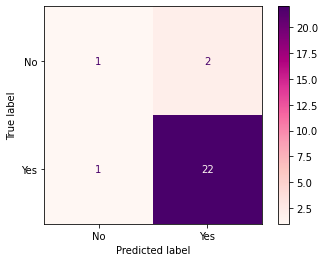

In [29]:
#Confusion Matrix

#This matrix will measure performance for machine learning classification problems including Recall, Precision, Specificity, 
#Accuracy, and most importantly AUC-ROC curves.

plot_confusion_matrix(xg_cl,X_test,y_test,cmap='RdPu')

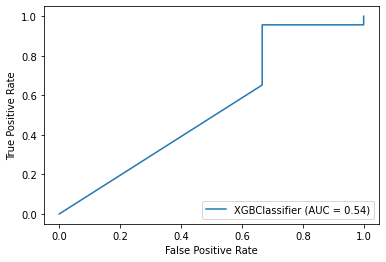

In [30]:
plot_roc_curve(xg_cl,X_test,y_test)

ROC Curve or Receiver Operating Characteristic Curve, is a graph that shows the performance of the classification model across all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate.

In [1]:
xgb.plot_importance(xg_cl)
plt.show() 

NameError: name 'xgb' is not defined

In [ ]:
#### Deployment

# At this stage, a prediction test will be carried out using test data and the classification model that has been made.

# Save model to file
import pickle
xg_cl.save_model("xgb_model.bin")



In [ ]:
# Try test data
testdata = pd.read_csv('../input/test-data-starbucks-survey/test data starbucks survey.csv')

In [ ]:
# Prediction results are placed in the Loyality column
testdata['Loyal'] = test_prediction

In [ ]:
testdata